# Business Case: LoanTap (Logistic Regression)

- LoanTap is an innovative online platform dedicated to providing customized loan solutions tailored to the needs of millennials. By reimagining the traditional loan landscape, LoanTap offers instant, flexible loans with consumer-friendly terms, catering specifically to salaried professionals and businessmen.

- In a bid to enhance their services, the data science team at LoanTap is developing an advanced underwriting layer aimed at accurately determining the creditworthiness of both MSMEs and individual borrowers. This underwriting process is crucial for deploying formal credit through LoanTap’s four primary financial instruments: Personal Loan, EMI Free Loan, Personal Overdraft, and Advance Salary Loan.

- This case study will delve into the intricacies of the underwriting process specifically for Personal Loans, highlighting the methodologies and data-driven approaches employed to assess and manage credit risk effectively.

### Objective:

- The objective of this project is to develop a robust, data-driven underwriting model that accurately assesses the creditworthiness of individuals based on a set of attributes. 
- The model will determine whether a credit line should be extended and, if approved, provide business recommendations for the optimal repayment terms. 
- This will ensure that LoanTap offers personalized, fair, and risk-adjusted loan solutions to its customers.

## Dataset Information:

#### Source:
Please check the dataset at: "[Dataset Link](https://drive.google.com/file/d/1ZPYj7CZCfxntE8p2Lze_4QO4MyEOy6_d/view)"

#### Feature Information:
- **loan_amnt :** The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
- **term :** The number of payments on the loan. Values are in months and can be either 36 or 60.
- **int_rate :** Interest Rate on the loan
- **installment :** The monthly payment owed by the borrower if the loan originates.
- **grade :** LoanTap assigned loan grade.
- **sub_grade :** LoanTap assigned loan subgrade.
- **emp_title :** The job title supplied by the Borrower when applying for the loan.
- **emp_length :** Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
- **home_ownership :** The home ownership status provided by the borrower during registration or obtained from the credit report.
- **annual_inc :** The self-reported annual income provided by the borrower during registration.
- **verification_status :** Indicates if income was verified by LoanTap, not verified, or if the income source was verified.
- **issue_d :** The month which the loan was funded.
- **loan_status :** Current status of the loan - Target Variable.
- **purpose :** A category provided by the borrower for the loan request.
- **title :** The loan title provided by the borrower.
- **dti :** A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LoanTap loan, divided by the borrower’s self-reported monthly income.
- **earliest_cr_line :** The month the borrower's earliest reported credit line was opened.
- **open_acc :** The number of open credit lines in the borrower's credit file.
- **pub_rec :** Number of derogatory public records.
- **revol_bal :** Total credit revolving balance.
- **revol_util :** Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
- **total_acc :** The total number of credit lines currently in the borrower's credit file.
- **initial_list_status :** The initial listing status of the loan. Possible values are – W(whole loans), F(fractional loans).
- **application_type :** Indicates whether the loan is an individual application or a joint application with two co-borrowers.
- **mort_acc :** Number of mortgage accounts.
- **pub_rec_bankruptcies :** Number of public record bankruptcies.
- **Address:** Address of the individual.

## Loading the "LoanTapData.csv" Dataset:
For exploring and analysing first we import the Python libraries like numpy,pandas,matplotlib,Seaborn,Scipy and then import the "LoanTapData.csv" dataset and save it in a dataframe "df".

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import (accuracy_score, 
                             confusion_matrix, 
                             roc_curve, auc, 
                             ConfusionMatrixDisplay,
                             f1_score, recall_score, precision_score, 
                             precision_recall_curve,
                             average_precision_score, 
                             classification_report)

In [2]:
df = pd.read_csv("LoanTapData.csv")

In [3]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16,0,36369,41.8,25,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17,0,20131,53.3,27,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13,0,11987,92.2,26,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6,0,5472,21.5,13,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13,0,24584,69.8,43,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


# 1. Basic Exploration of Data

In [4]:
# getting the shape of the dataframe

df.shape

(396030, 27)

In [5]:
# getting the columns of the dataframe

df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

In [6]:
# getting the data types of columns

df.dtypes

loan_amnt                 int64
term                     object
int_rate                float64
installment             float64
grade                    object
sub_grade                object
emp_title                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
title                    object
dti                     float64
earliest_cr_line         object
open_acc                  int64
pub_rec                   int64
revol_bal                 int64
revol_util              float64
total_acc                 int64
initial_list_status      object
application_type         object
mort_acc                float64
pub_rec_bankruptcies    float64
address                  object
dtype: object

In [7]:
# Converting the dtype of columns issue_d and earliest_cr_line to datatime

df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%y')
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], errors = 'coerce')

In [8]:
# Getting pincode from the column address 

df['pincode'] = df['address'].str.split(' ').str[-1]

In [9]:
# getting the number of unique values in each column

df.nunique()

loan_amnt                 1397
term                         2
int_rate                   566
installment              55706
grade                        7
sub_grade                   35
emp_title               173103
emp_length                  11
home_ownership               6
annual_inc               27197
verification_status          3
issue_d                    115
loan_status                  2
purpose                     14
title                    48788
dti                       4262
earliest_cr_line           518
open_acc                    61
pub_rec                     20
revol_bal                55622
revol_util                1226
total_acc                  118
initial_list_status          2
application_type             3
mort_acc                    33
pub_rec_bankruptcies         9
address                 393700
pincode                     10
dtype: int64

In [10]:
# Converting columns with less number of unique values to categorical columns

cat_cols = ['term', 'grade', 'sub_grade', 
            'home_ownership', 'verification_status', 'loan_status', 'purpose', 
            'initial_list_status', 'application_type']

df[cat_cols] = df[cat_cols].astype('category')

In [11]:
# getting the info of the dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   loan_amnt             396030 non-null  int64         
 1   term                  396030 non-null  category      
 2   int_rate              396030 non-null  float64       
 3   installment           396030 non-null  float64       
 4   grade                 396030 non-null  category      
 5   sub_grade             396030 non-null  category      
 6   emp_title             373103 non-null  object        
 7   emp_length            377729 non-null  object        
 8   home_ownership        396030 non-null  category      
 9   annual_inc            396030 non-null  float64       
 10  verification_status   396030 non-null  category      
 11  issue_d               396030 non-null  datetime64[ns]
 12  loan_status           396030 non-null  category      
 13 

In [12]:
# Checking for duplicate records

df.duplicated().sum()

0

- There is no duplicate rows in the dataframe.

In [13]:
# Checking for missing values

df.isnull().sum()

loan_amnt                    0
term                         0
int_rate                     0
installment                  0
grade                        0
sub_grade                    0
emp_title                22927
emp_length               18301
home_ownership               0
annual_inc                   0
verification_status          0
issue_d                      0
loan_status                  0
purpose                      0
title                     1755
dti                          0
earliest_cr_line        189905
open_acc                     0
pub_rec                      0
revol_bal                    0
revol_util                 276
total_acc                    0
initial_list_status          0
application_type             0
mort_acc                 37795
pub_rec_bankruptcies       535
address                      0
pincode                      0
dtype: int64

- We can clearly see, there are a lot of missing values in some columns. We will treat them later.

# 2. Exploratory Data Analysis

## Statistical Summary:

In [14]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


- The average loan amount is 12000 and maximum amount is 40000.
- The maximun interest rate is 30% and minimum is 5% and average is 13%.
- There is a huge difference in the mean and median for the columns loan_amnt, installment, pub_rec. These columns might contain outliers.

In [15]:
df.describe(include = ['object', 'category'])

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,loan_status,purpose,title,initial_list_status,application_type,address,pincode
count,396030,396030,396030,373103,377729,396030,396030,396030,396030,394275,396030,396030,396030,396030
unique,2,7,35,173103,11,6,3,2,14,48788,2,3,393700,10
top,36 months,B,B3,Teacher,10+ years,MORTGAGE,Verified,Fully Paid,debt_consolidation,Debt consolidation,f,INDIVIDUAL,USCGC Smith\r\nFPO AE 70466,70466
freq,302005,116018,26655,4389,126041,198348,139563,318357,234507,152472,238066,395319,8,56985


- Most of the loans have a term of 36 months.
- The majority of loans are graded as B.
- Most of the applicants are Teachers in profession.
- Most of the loan applicant have mortgage the home.
- Majority of loans been fully paid off.
- Majorily the loans been applied for the purpose of debt consolidation.
- Most of the applicant are Individual.

## Univariate Analysis:

In [16]:
# Checking the distribution of the Target variable

df['loan_status'].value_counts(normalize = True)*100

Fully Paid     80.387092
Charged Off    19.612908
Name: loan_status, dtype: float64

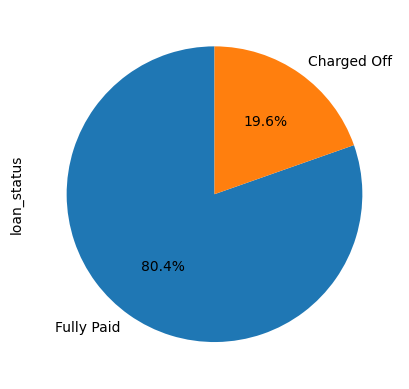

In [17]:
df['loan_status'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%', startangle = 90)
plt.show()

- 80% belongs to the class 0 : which is loan fully paid.
- 20% belongs to the class 1 : which were charged off.
- **So dataset is highly imbalanced.**

In [18]:
# Checking the distribution of the initial_list_status

df['initial_list_status'].value_counts(normalize=True)*100

f    60.113123
w    39.886877
Name: initial_list_status, dtype: float64

- 60% belongs to whole loans(w).
- 40% belongs to fractional loans(f).

In [19]:
# Checking the distribution of the application_type

df['application_type'].value_counts(normalize=True)*100

INDIVIDUAL    99.820468
JOINT          0.107315
DIRECT_PAY     0.072217
Name: application_type, dtype: float64

- Maximum belongs to INDIVIDUAL application.

In [20]:
# Checking the distribution of the term

df['term'].value_counts(normalize=True)*100

 36 months    76.258112
 60 months    23.741888
Name: term, dtype: float64

- 36-month loan terms apply to 76% of the loans, while 60-month loan terms apply to 24% of them.

In [21]:
# Checking the distribution of the home_ownership
 
df['home_ownership'].value_counts(normalize=True)*100

MORTGAGE    50.084085
RENT        40.347953
OWN          9.531096
OTHER        0.028281
NONE         0.007828
ANY          0.000758
Name: home_ownership, dtype: float64

- 50% loans belongs to mortgage.
- 40% loans belongs to rent.

In [22]:
# Checking the distribution of the verification_status

df['verification_status'].value_counts(normalize=True)*100

Verified           35.240512
Source Verified    33.175517
Not Verified       31.583971
Name: verification_status, dtype: float64

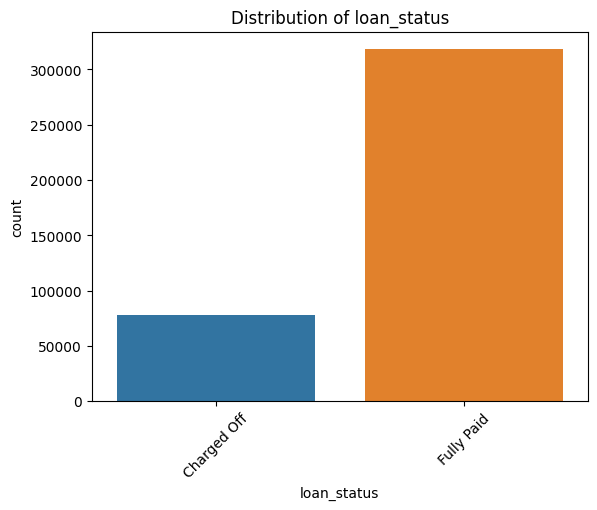

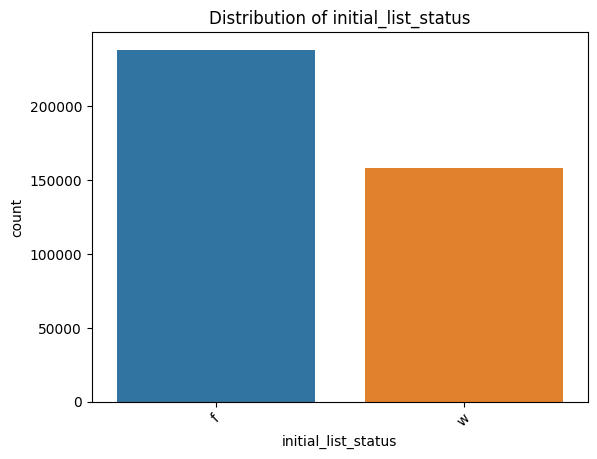

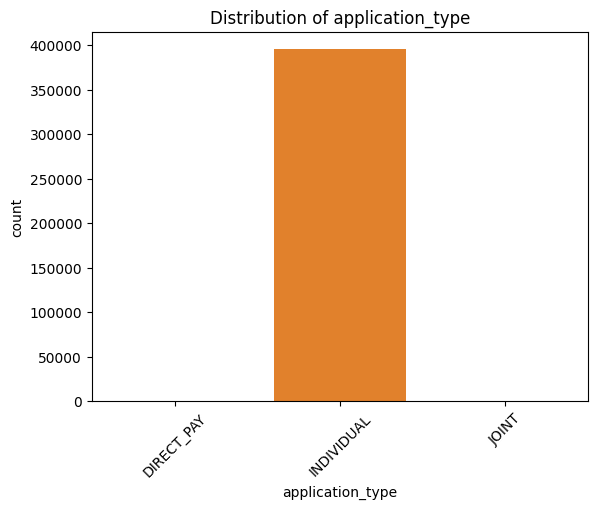

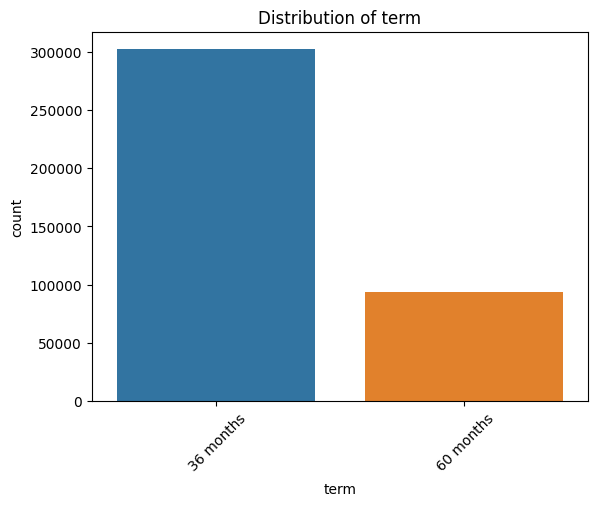

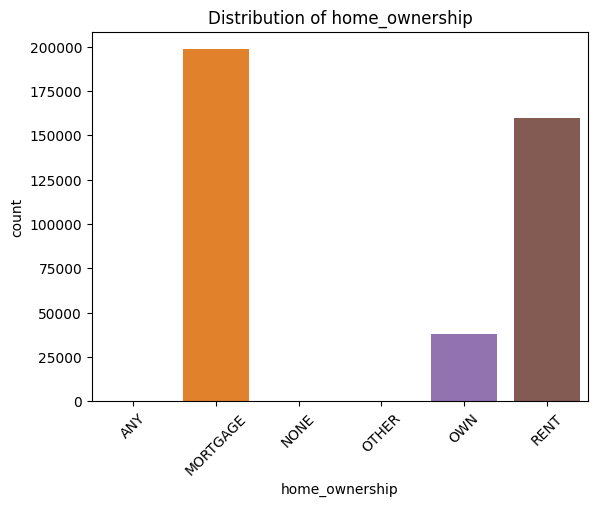

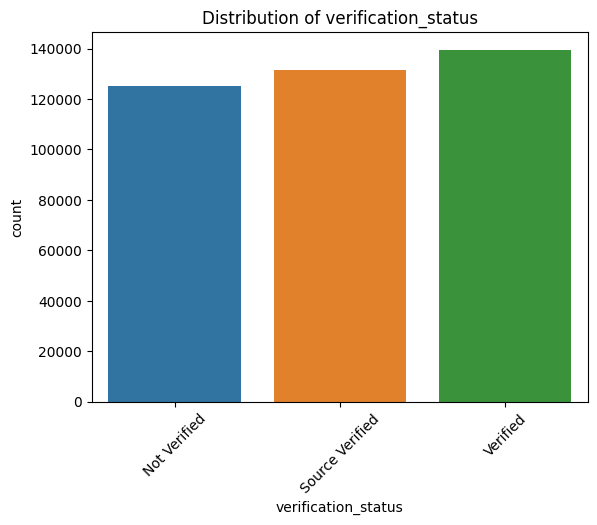

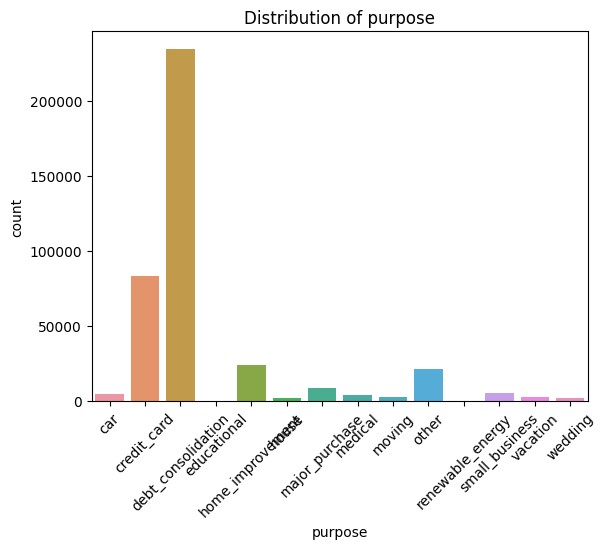

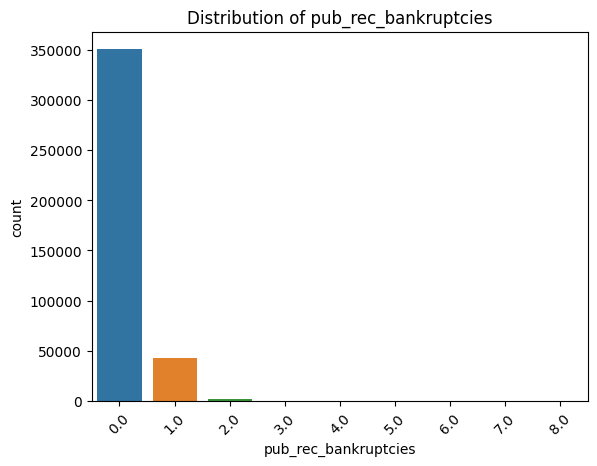

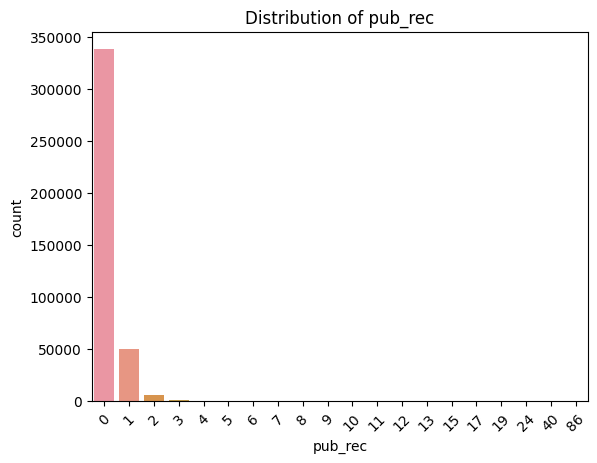

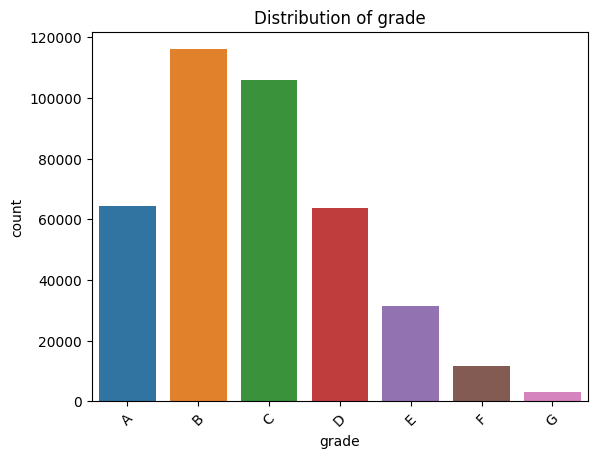

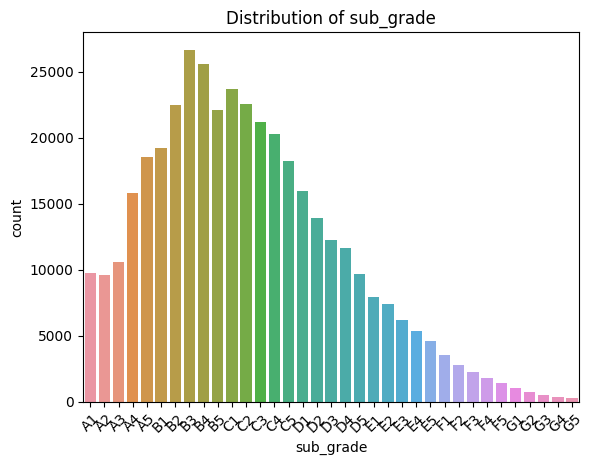

In [23]:
# Distribution of categorical variables

cat_cols = ['loan_status', 'initial_list_status',
            'application_type', 'term', 'home_ownership','verification_status', 'purpose',
            'pub_rec_bankruptcies', 'pub_rec', 'grade', 'sub_grade']


for col in cat_cols:
    plt.title(f"Distribution of {col}")
    sns.countplot(x = df[col], data = df)
    plt.xticks(rotation = 45)
    plt.show()


- The loan status target variable is biased towards fully-paid loans, with defaulters accounting for approximately 25% of fully-paid instances.
- Nearly 80% of the loans have a term of 36 months.
- For 50% of cases, the type of home ownership is mortgage.
- Approximately 85% of applicants do not have a public record or have not filed for bankruptcy.
- The majority of loans (30%) are graded as B, followed by C, A, and D respectively.
- Nearly all applicants (99%) have applied under the 'individual' application type.
- The most common purpose for taking out loans is debt consolidation, accounting for 55%, followed by 20% for credit card purposes.

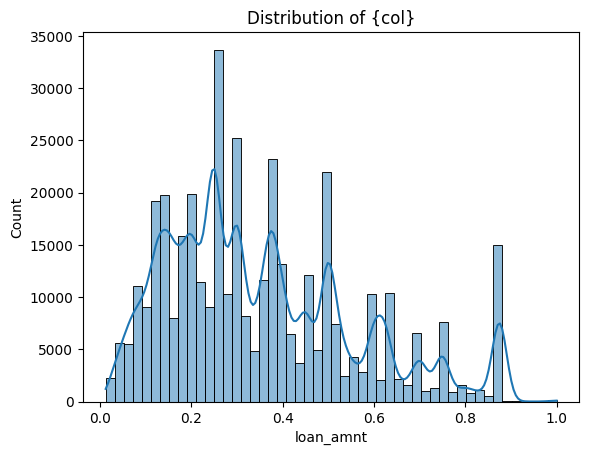

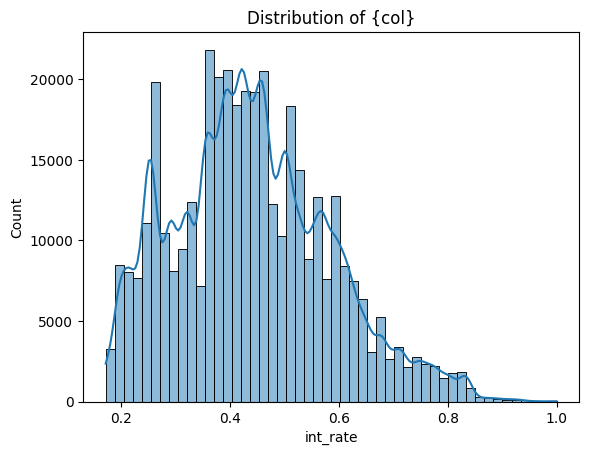

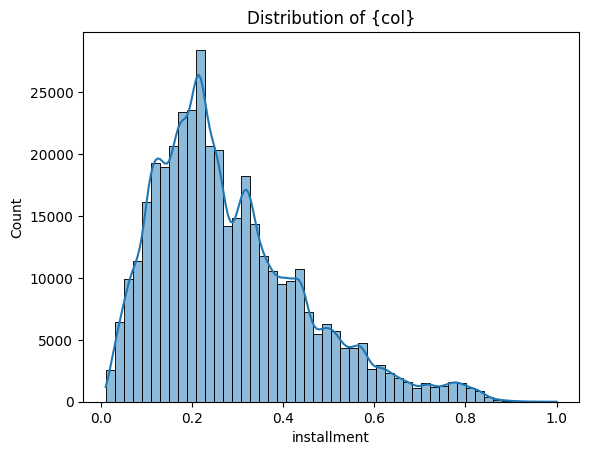

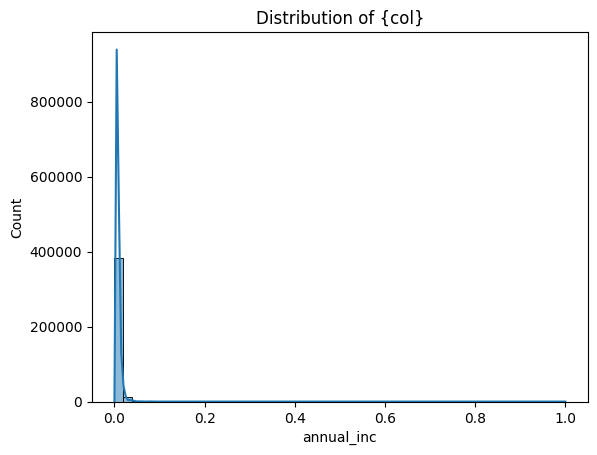

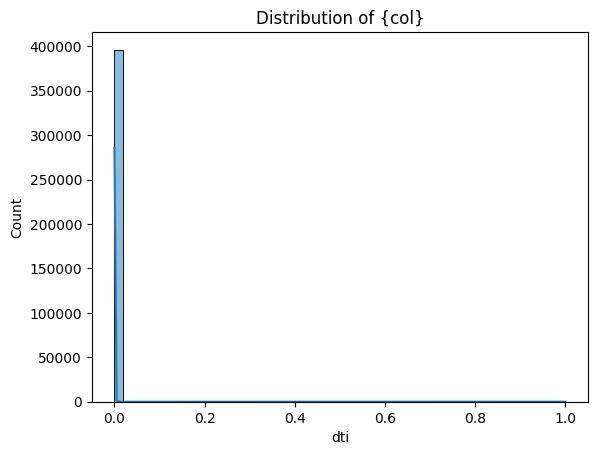

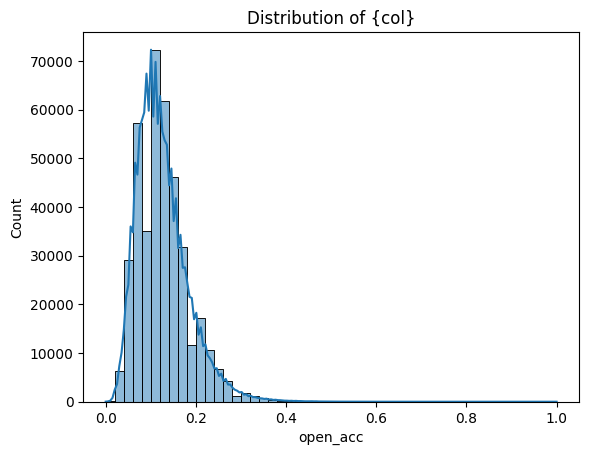

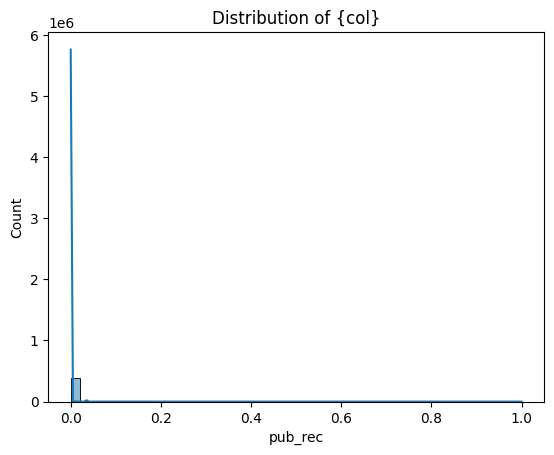

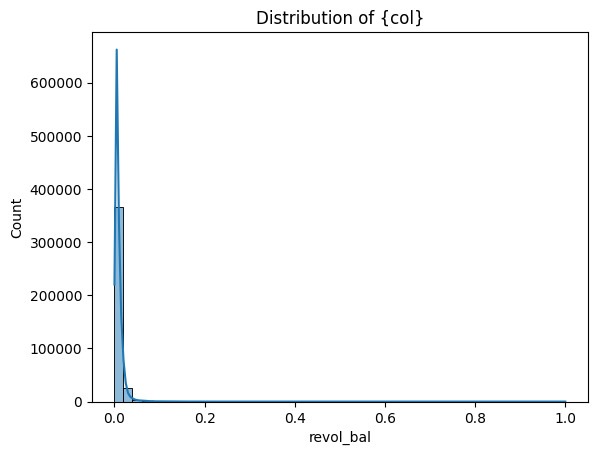

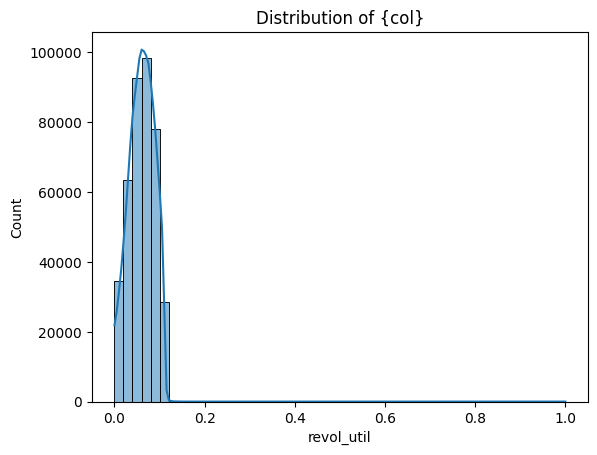

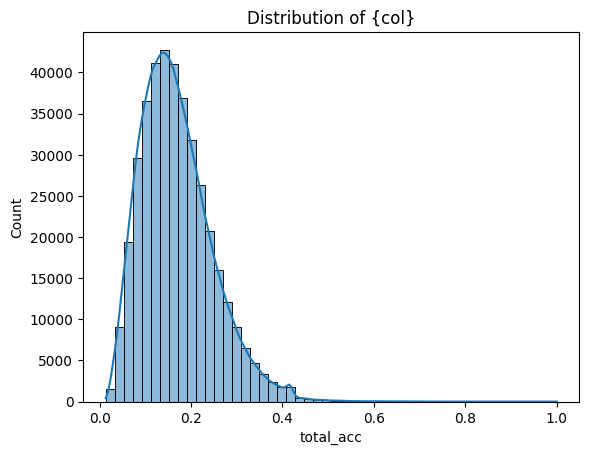

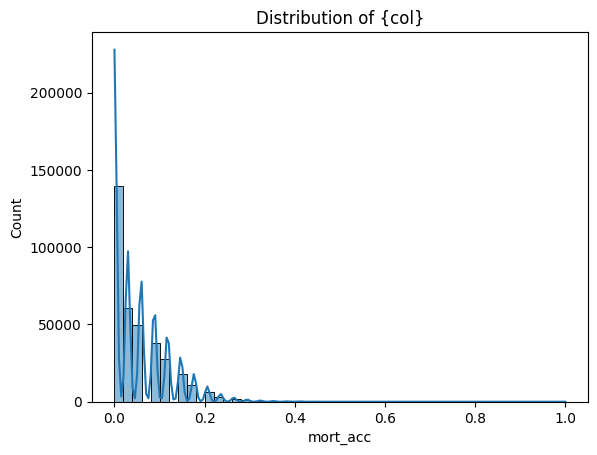

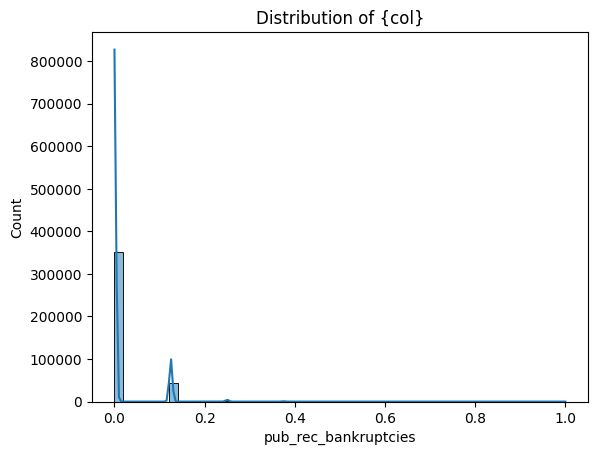

In [24]:
# Distribution of numerical variables

num_cols = df.select_dtypes(include='number').columns

for col in num_cols:
    plt.title("Distribution of {col}")
    sns.histplot(df[col]/df[col].max(), kde=True, bins=50)
    plt.show()

- Most of the distribution is highly skewed which tells us that they might contain outliers.

## Bivariate Analysis:

In [25]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


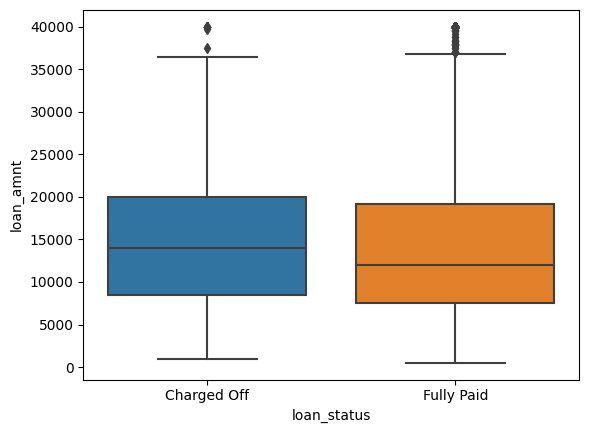

In [26]:
# # Distribution of loan_amnt and loan_status

sns.boxplot(x = 'loan_status', y = 'loan_amnt', data = df)
plt.show()

- for loan status Charged_off, the mean and median of loan_amount is higher than fully paid.
- Also the distribution of loan_amnt is right skewed, which says it has outlier presence.

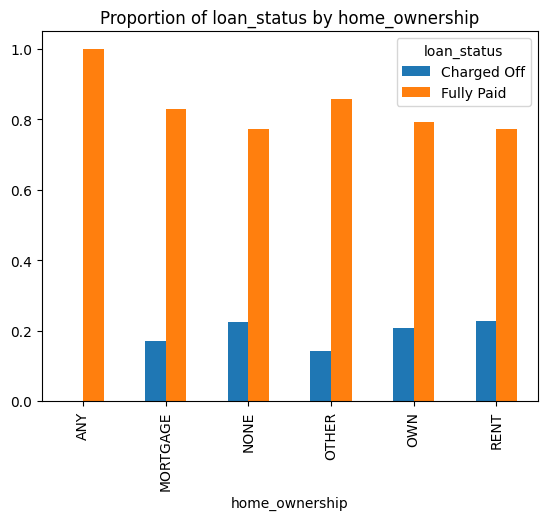

In [27]:
# Distribution of home_ownership and loan_status

pd.crosstab(index = df["home_ownership"], columns= df["loan_status"], normalize= "index").plot(kind= "bar")
plt.title("Proportion of loan_status by home_ownership")
plt.show()

- For all categories of home ownership, the proportion of loans that are "Fully Paid" is significantly higher than those that are "Charged Off".
- The categories ANY show no risk of loans being "Charged Off", while MORTGAGE, NONE, OTHER, OWN, and RENT have a similar or  relatively low risk of loans being "Charged Off".

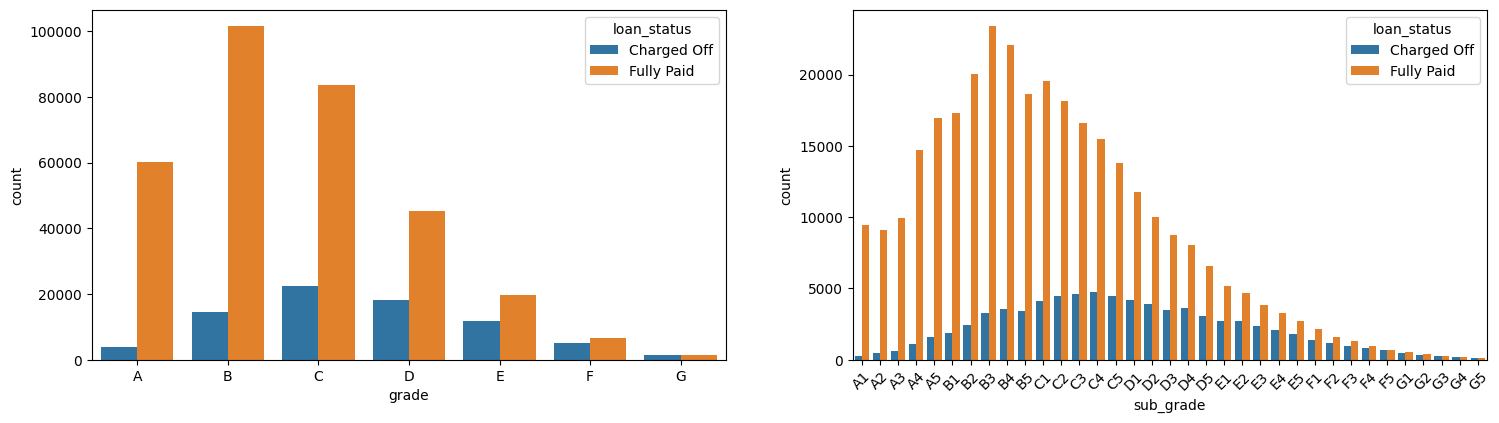

In [28]:
plt.figure(figsize=(18, 10))

plt.subplot(2, 2, 1)
grade = sorted(df.grade.unique().tolist())
sns.countplot(x='grade', data=df, hue='loan_status', order=grade)

plt.subplot(2, 2, 2)
sub_grade = sorted(df.sub_grade.unique().tolist())
sns.countplot(x='sub_grade', data=df, hue='loan_status', order=sub_grade)
plt.xticks(rotation = 45)

plt.show()

- The grade of majority of people those who have fully paid the loan is 'B' and have subgrade 'B3'.
- So from that we can infer that people with grade 'B' and subgrade 'B3' are more likely to fully pay the loan.

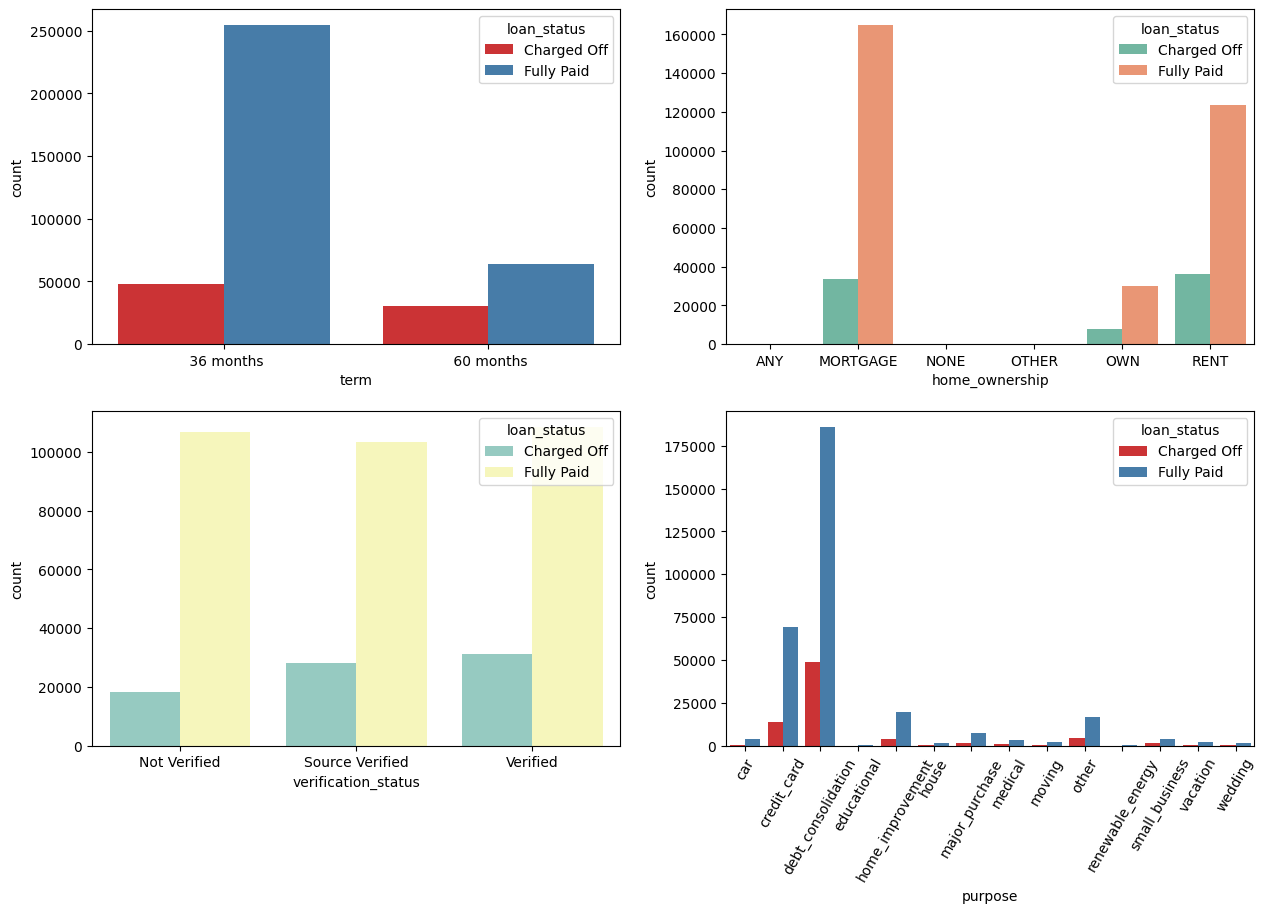

In [29]:
plt.figure(figsize=(15,20))

plt.subplot(4,2,1)
sns.countplot(x='term',data=df,hue='loan_status', palette = 'Set1')

plt.subplot(4,2,2)
sns.countplot(x='home_ownership',data=df,hue='loan_status', palette = 'Set2')

plt.subplot(4,2,3)
sns.countplot(x='verification_status',data=df,hue='loan_status', palette = 'Set3')

plt.subplot(4,2,4)
sns.countplot(x='purpose',data=df,hue='loan_status', palette = 'Set1')
plt.xticks(rotation=60)

plt.show()

- Most of the people took loan for 36 months and full paid on time.
- Most of people have home ownership as mortgage and rent.
- There are almost 33% not veryfied loan_status. 
- Most of the people took loan for debt consolidations.
- Verified borrowers have more defaulters than not verified borrowers.

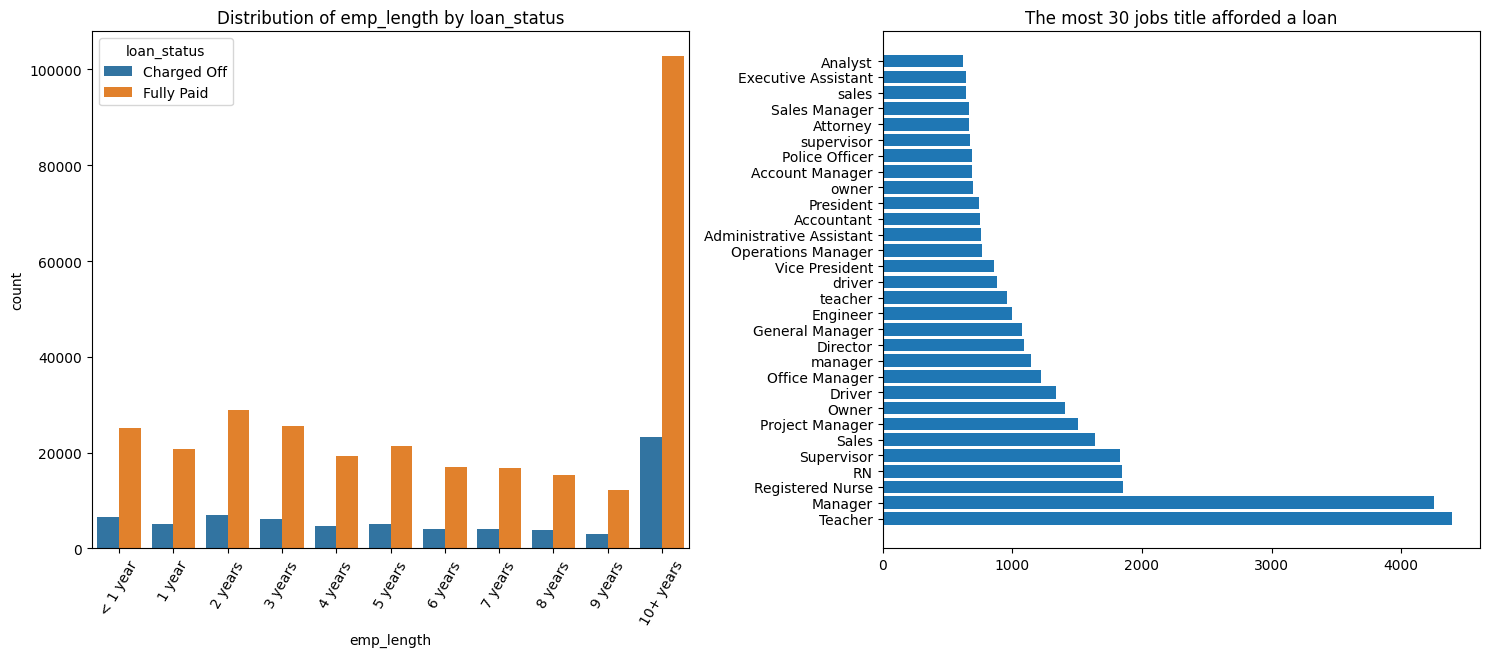

In [30]:
plt.figure(figsize=(15,12))

plt.subplot(2,2,1)
order = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', 
          '6 years', '7 years', '8 years', '9 years', '10+ years',]
sns.countplot(x='emp_length',data=df,hue='loan_status',order=order)
plt.title("Distribution of emp_length by loan_status")
plt.xticks(rotation=60)

plt.subplot(2,2,2)
plt.barh(df['emp_title'].value_counts()[:30].index, df['emp_title'].value_counts()[:30].values)
plt.title("The most 30 jobs title afforded a loan")
plt.tight_layout()

plt.show()

- Manager and Teacher are the most afforded loan on titles.
- Person who employed for more than 10 years has successfully paid of the loan.

## Multivariate Analysis:

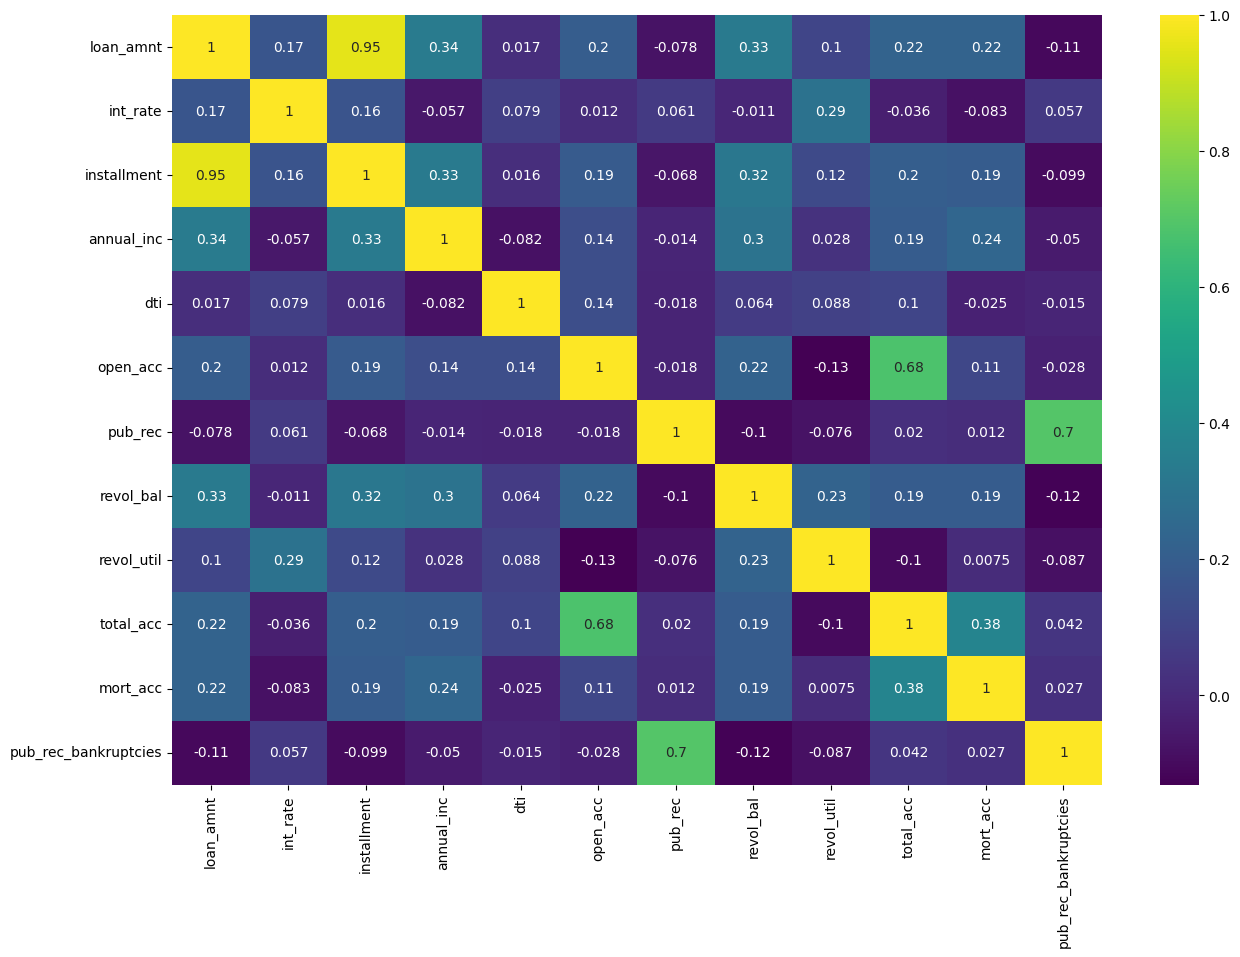

In [31]:
# Heatmap

plt.figure(figsize = (15, 10))
sns.heatmap(df.corr(numeric_only = True), annot = True, cmap='viridis')
plt.show()

- We noticed, there is a strong correlation between "loan_amnt" the "installment" column.
- loan_amnt: The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

## Data Processing:

In [32]:
df.isnull().sum()

loan_amnt                    0
term                         0
int_rate                     0
installment                  0
grade                        0
sub_grade                    0
emp_title                22927
emp_length               18301
home_ownership               0
annual_inc                   0
verification_status          0
issue_d                      0
loan_status                  0
purpose                      0
title                     1755
dti                          0
earliest_cr_line        189905
open_acc                     0
pub_rec                      0
revol_bal                    0
revol_util                 276
total_acc                    0
initial_list_status          0
application_type             0
mort_acc                 37795
pub_rec_bankruptcies       535
address                      0
pincode                      0
dtype: int64

- In both the 'Categorical' and 'Numerical' columns have a significant amount of missing data.
- But the Dataset is very large, we can drop the rows with null values.

In [33]:
df.dropna(inplace = True)

In [34]:
df.shape

(168209, 28)

In [35]:
df.isna().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_title               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
title                   0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
pincode                 0
dtype: int64

## Feature Engineering:

In [36]:
def  pub_rec(number):
    if number == 0:
        return 0
    else:
        return 1

def mort_acc(number):
    if number == 0.0:
        return 0
    elif number >= 1.0:
        return 1
    else:
        return number
    
    
def pub_rec_bankruptcies(number):
    if number == 0.0:
        return 0
    elif number >= 1.0:
        return 1
    else:
        return number

In [37]:
df['pub_rec']=df.pub_rec.apply(pub_rec)
df['mort_acc']=df.mort_acc.apply(mort_acc)
df['pub_rec_bankruptcies']=df.pub_rec_bankruptcies.apply(pub_rec_bankruptcies)

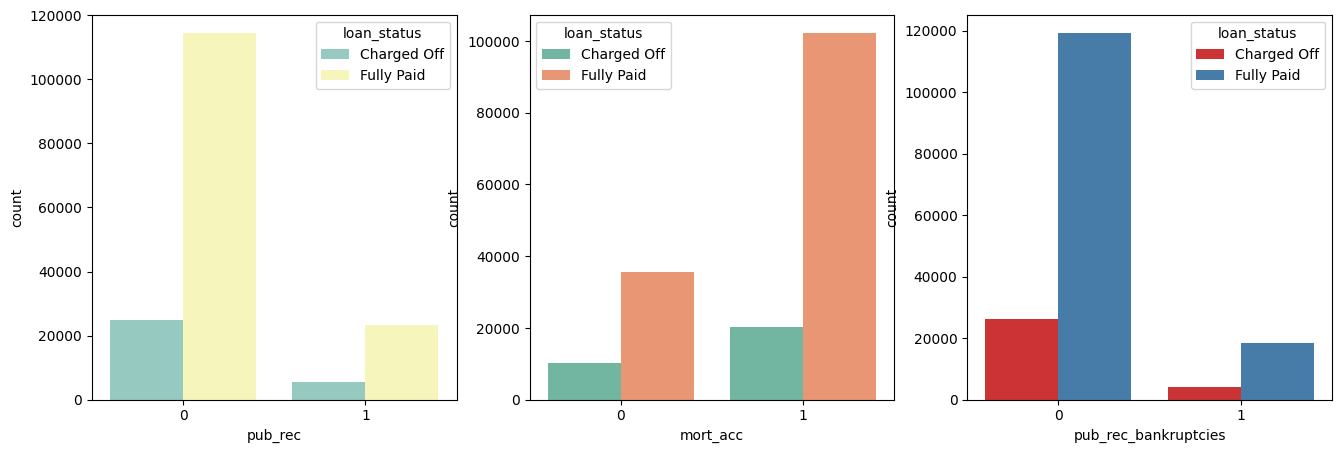

In [38]:
plt.figure(figsize=(16,5))

plt.subplot(1,3,1)
sns.countplot(x='pub_rec',data=df,hue='loan_status', palette='Set3')

plt.subplot(1,3,2)
sns.countplot(x='mort_acc',data=df,hue='loan_status', palette='Set2')

plt.subplot(1,3,3)
sns.countplot(x='pub_rec_bankruptcies',data=df,hue='loan_status', palette='Set1')

plt.show()

In [39]:
# Dropping some variables which we can let go for now 

df.drop(columns=['issue_d', 'emp_title', 'title', 'sub_grade',
                   'address', 'earliest_cr_line', 'emp_length'], 
                   axis=1, inplace=True)

In [40]:
# Mapping Categorical Values to Numerical Values

df['loan_status']=df.loan_status.map({'Fully Paid':0, 'Charged Off':1})

term_values={' 36 months': 36, ' 60 months':60}
df['term'] = df.term.map(term_values)

list_status = {'w': 0, 'f': 1}
df['initial_list_status'] = df.initial_list_status.map(list_status)

## Outlier Detection & Treatment:

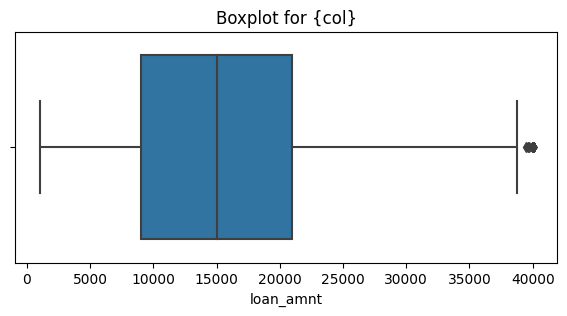

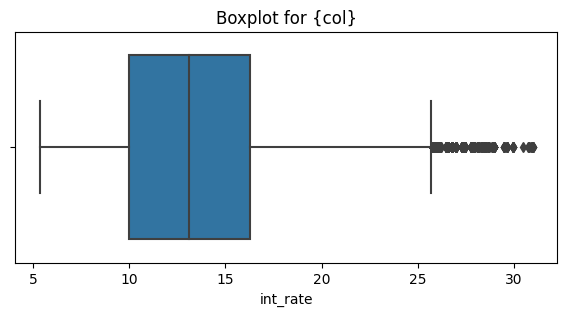

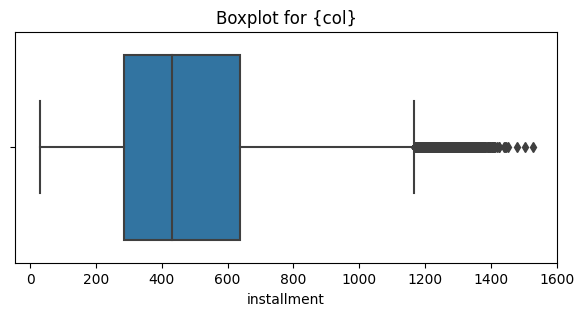

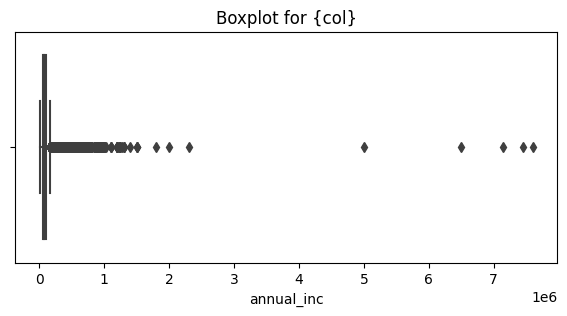

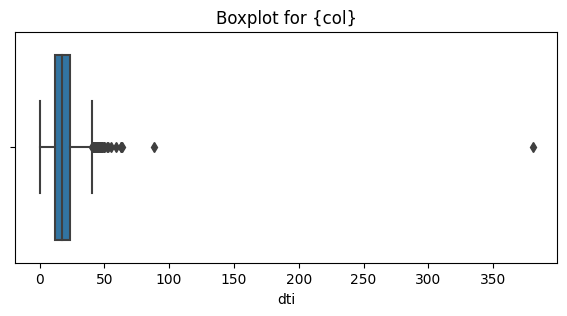

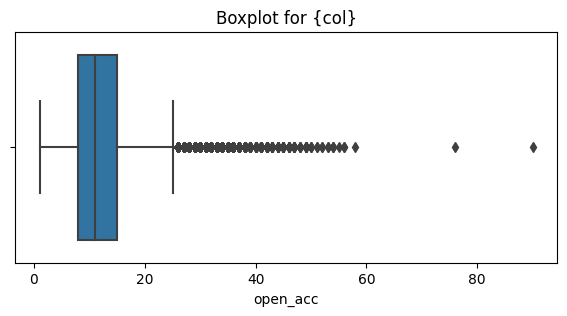

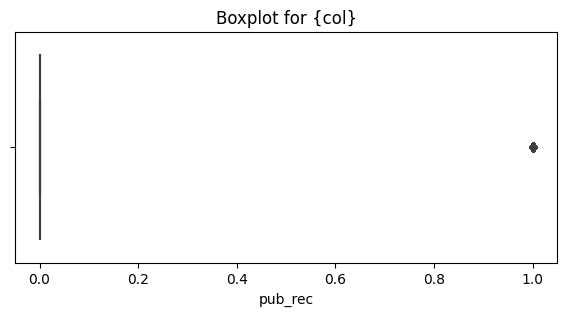

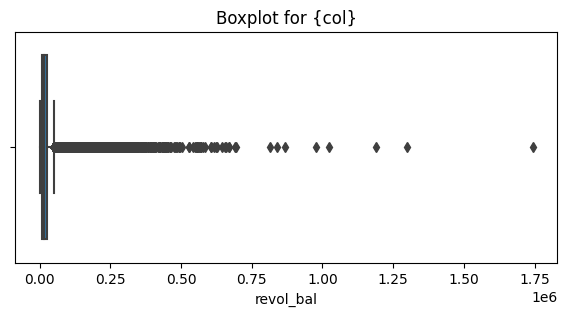

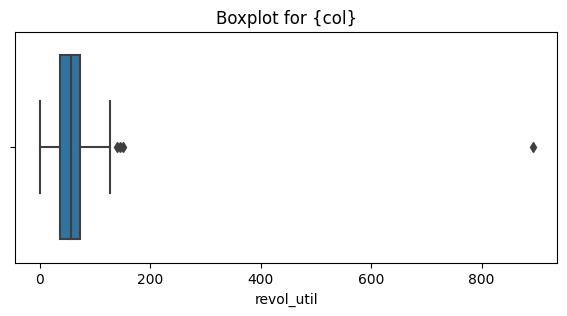

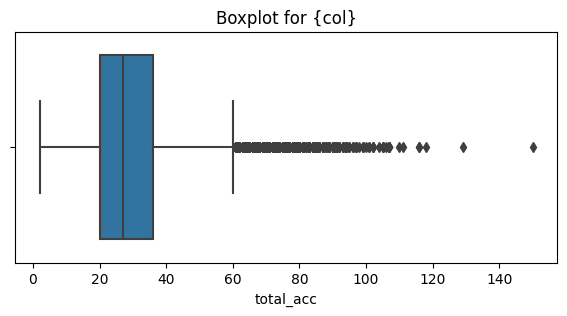

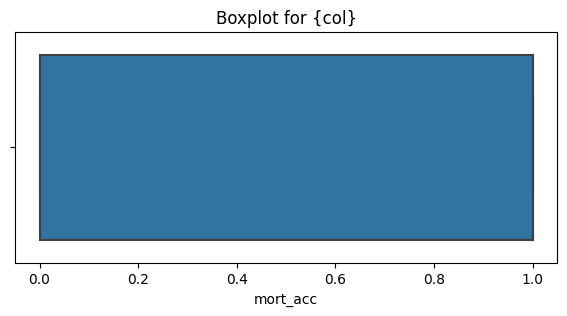

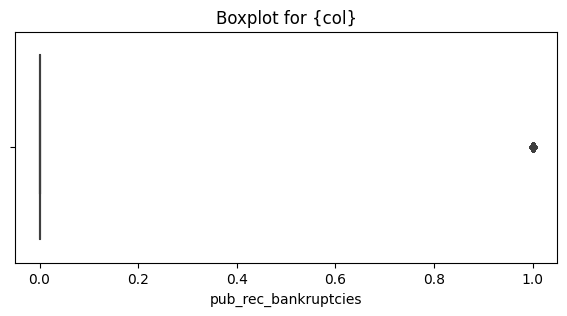

In [41]:
numerical_col=df.select_dtypes(include='number')
num_cols = numerical_col.columns

for col in num_cols:
    plt.figure(figsize=(7,3))
    sns.boxplot(x=df[col])
    plt.title('Boxplot for {col}')
    plt.show()

In [42]:
df[num_cols].skew()

loan_amnt                0.569852
int_rate                 0.431748
installment              0.805779
annual_inc              35.609623
dti                      0.782877
open_acc                 1.198675
pub_rec                  1.748415
revol_bal               10.693050
revol_util               0.050956
total_acc                0.809327
mort_acc                -1.023971
pub_rec_bankruptcies     2.140219
dtype: float64

In [43]:
for col in num_cols:
    mean = df[col].mean()
    std = df[col].std()
    
    upper_limit = mean+3*std
    lower_limit = mean-3*std
    
    df = df[(df[col]<upper_limit) & (df[col]>lower_limit)]

In [44]:
df.shape

(160275, 21)

## One Hot Encoding:

In [45]:
dummies=['grade', 'home_ownership', 'verification_status', 'purpose', 'application_type', 'pincode']
df=pd.get_dummies(df,columns=dummies, drop_first=True)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

df.head()

,loan_amnt,term,int_rate,installment,annual_inc,loan_status,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,mort_acc,pub_rec_bankruptcies,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,application_type_INDIVIDUAL,application_type_JOINT,pincode_05113,pincode_11650,pincode_22690,pincode_29597,pincode_30723,pincode_48052,pincode_70466,pincode_86630,pincode_93700
0,10000,36,11.44,329.48,117000.0,0,26.24,16,0,36369,41.8,25,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0
4,24375,60,17.27,609.33,55000.0,1,33.95,13,0,24584,69.8,43,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
7,13000,36,11.14,426.47,46000.0,0,26.87,11,0,13425,64.5,15,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
8,18900,60,10.99,410.84,103000.0,0,12.52,13,0,18637,32.9,40,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
9,26300,36,16.29,928.40,115000.0,0,23.69,13,0,22171,82.4,37,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


# Model Building

## Train-Test Split:

In [46]:
from sklearn.model_selection import train_test_split

X = df.drop('loan_status', axis = 1)
y = df['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
print(X_train.shape)
print(X_test.shape)

(128220, 51)
(32055, 51)


In [47]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc',
       'loan_status', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'mort_acc', 'pub_rec_bankruptcies',
       'grade_B', 'grade_C', 'grade_D', 'grade_E', 'grade_F', 'grade_G',
       'home_ownership_MORTGAGE', 'home_ownership_NONE',
       'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT',
       'verification_status_Source Verified', 'verification_status_Verified',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'application_type_INDIVIDUAL',
       'application_type_JOINT', 'pincode_05113', 'pincode_11650',
       'pincode_22690', 'pincode_29597', 'pincode_30723', 'pin

## Standardization using MinMaxScaler:

In [48]:
from sklearn.preprocessing import MinMaxScaler

scale = MinMaxScaler()
X_train = pd.DataFrame(scale.fit_transform(X_train), columns = X_train.columns)
X_test = pd.DataFrame(scale.fit_transform(X_test), columns = X_test.columns)

## Oversampling with SMOTE:

- Since the dataset is highly imbalanced, we will do oversampling with SMOTE.

In [49]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

print(f"Before OverSampling, count of label 1: {sum(y_train == 1)}")
print(f"Before OverSampling, count of label 0: {sum(y_train == 0)}")
print(f"After OverSampling, count of label 1: {sum(y_train_res == 1)}")
print(f"After OverSampling, count of label 0: {sum(y_train_res == 0)}")

Before OverSampling, count of label 1: 23278
Before OverSampling, count of label 0: 104942
After OverSampling, count of label 1: 104942
After OverSampling, count of label 0: 104942


## Logistic Regression:

In [50]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_res, y_train_res)

train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

## Model Evaluation:

In [51]:
from sklearn.metrics import (accuracy_score, confusion_matrix, roc_curve, auc, 
                             ConfusionMatrixDisplay,
                             f1_score, recall_score, precision_score, 
                             precision_recall_curve, average_precision_score, 
                             classification_report)

In [52]:
# Model Evaluation

print('Train Accuracy :', model.score(X_train, y_train).round(2))
print('Train F1 Score:',f1_score(y_train,train_preds).round(2))
print('Train Recall Score:',recall_score(y_train,train_preds).round(2))
print('Train Precision Score:',precision_score(y_train,train_preds).round(2))

print('\nTest Accuracy :',model.score(X_test,y_test).round(2))
print('Test F1 Score:',f1_score(y_test,test_preds).round(2))
print('Test Recall Score:',recall_score(y_test,test_preds).round(2))
print('Test Precision Score:',precision_score(y_test,test_preds).round(2))

Train Accuracy : 0.81
Train F1 Score: 0.6
Train Recall Score: 0.81
Train Precision Score: 0.48

Test Accuracy : 0.79
Test F1 Score: 0.59
Test Recall Score: 0.82
Test Precision Score: 0.46


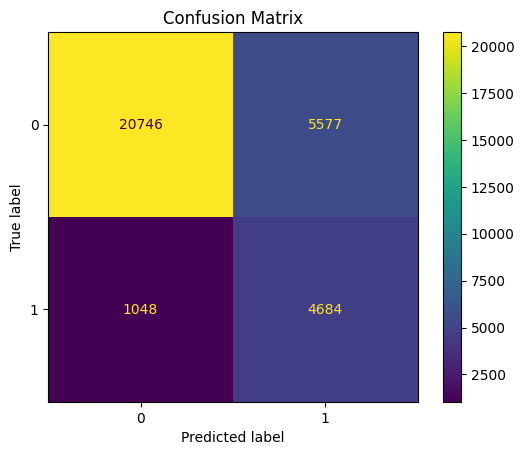

In [53]:
# Confusion Matrix

cm = confusion_matrix(y_test, test_preds)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

### Classification Report:

In [54]:
print(classification_report(y_test, test_preds))

              precision    recall  f1-score   support

           0       0.95      0.79      0.86     26323
           1       0.46      0.82      0.59      5732

    accuracy                           0.79     32055
   macro avg       0.70      0.80      0.72     32055
weighted avg       0.86      0.79      0.81     32055



- We notice that the recall score is notably high, indicating our model can identify 79% of actual defaulters. However, the precision for the positive class is low; only 46% of the predicted defaulters are actual defaulters.

- While this model effectively identifies a significant portion of defaulters, it risks denying loans to deserving customers due to the high rate of false positives.

- Furthermore, the low precision contributes to a decrease in the F1 score to 59%, despite the accuracy being 79%.

## Feature Importance:

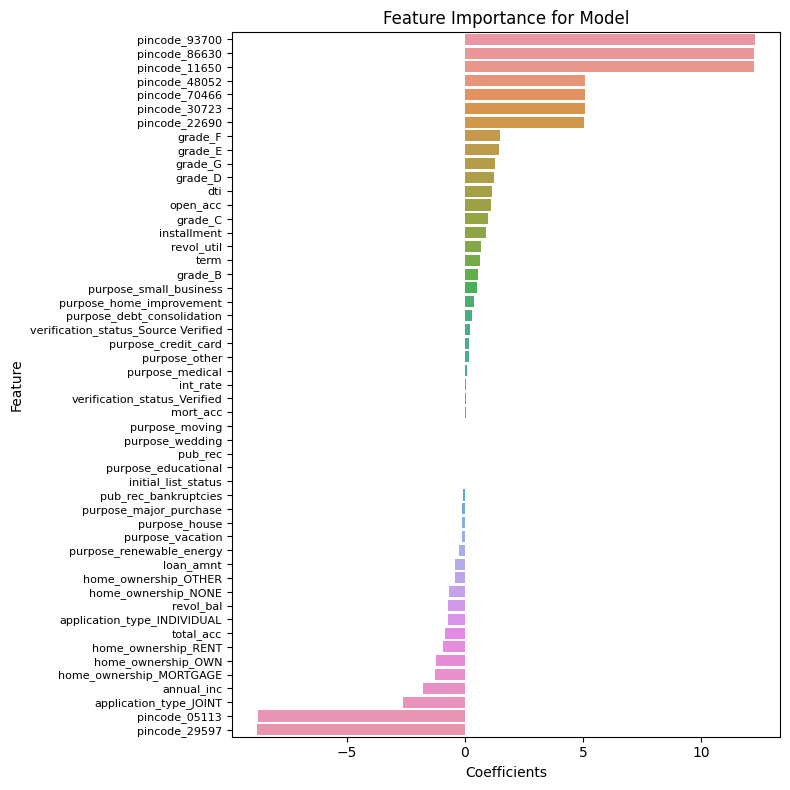

In [55]:
feature_imp = pd.DataFrame({'Columns':X_train.columns,
                            'Coefficients':model.coef_[0]}).round(2).sort_values('Coefficients', ascending=False)

plt.figure(figsize=(8,8))
sns.barplot(y = feature_imp['Columns'],
           x =  feature_imp['Coefficients'])
plt.title("Feature Importance for Model")
plt.yticks(fontsize=8)
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

- Features with the largest positive and largest negative coefficients contribute the most to predicting the target variable positively.
- Pincode is a major determinant in the model’s predictions, which might reflect socio-economic factors tied to different regions.
- Different loan grades (like grade_F, grade_E, grade_G, etc.) have varying impacts, with higher risk grades (F, E, G) generally contributing positively to the model's target variable.
- Home_ownership_status also contributing negatively to the model's target variable.
- Features like dti (debt-to-income ratio), open_acc (number of open credit lines), installment, and revol_util (revolving credit utilization) are influential in the model, suggesting that the borrower's financial status is an important predictor.
- Features related to the loan itself (e.g., term, installment) and the borrower's financial behavior and background (e.g., purpose_small_business, purpose_home_improvement) are also important but less so than pincode and credit grades.
- verification_status_Source Verified, application_type_JOINT and application_type_INDIVIDUAL have less impact in model's target variable.

# ROC Curve & AUC

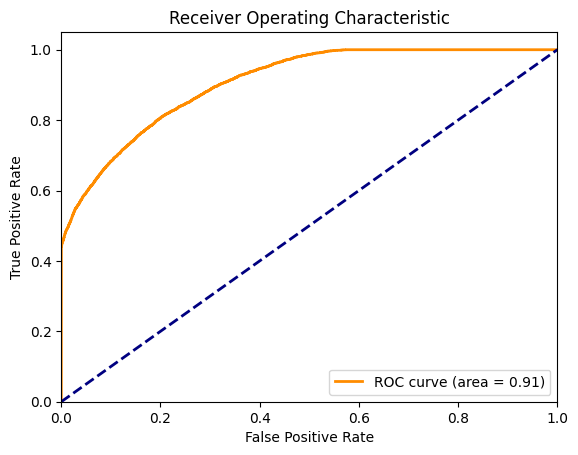

In [56]:
# Predict probabilities for the test set
probs = model.predict_proba(X_test)[:,1]

# Compute the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, probs)

# Compute the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

- An AUC of 0.91 indicates that the model effectively distinguishes between the positive and negative classes.

- However, it's not an ideal metric for imbalanced target variables since it can be high even when the classifier performs poorly on the minority class.

- This discrepancy occurs when the classifier excels at classifying instances from the majority class, which are more prevalent in the dataset. Consequently, the AUC might appear high, masking the model's inability to accurately identify instances from the minority class.

### Precision Recall Curve:

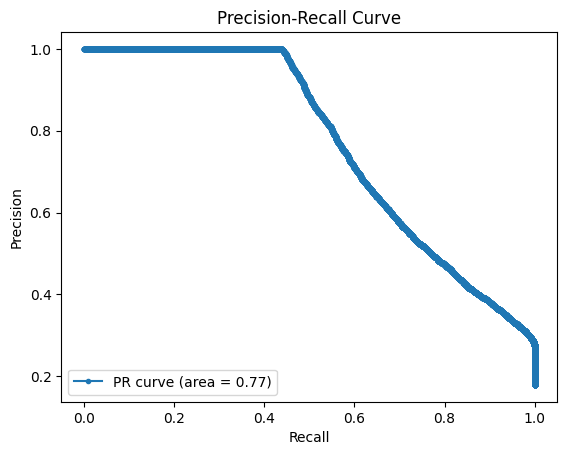

In [57]:
precision, recall, thr = precision_recall_curve(y_test, probs)

# Area under Precision Recall Curve
apc = average_precision_score(y_test, probs)

# Plot the precision-recall curve
plt.plot(recall, precision, marker='.', label='PR curve (area = %0.2f)' % apc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

- The area under the precision-recall curve (AUC-PR) is not as high as desired. While it exceeds the benchmark of 0.5 for a random model, indicating some level of effectiveness.

# Tradeoff Questions:

**Q1. How can we make sure that our model can detect real defaulters and there are less false positives? This is important as we can lose out on an opportunity to finance more individuals and earn interest on it?**

**Ans:** 
- The precision score serves as an indicator of Type I error (false positives). By increasing the precision score of the model, we can minimize false positives. This ensures that the company will not mistakenly deny loans to individuals who are actually creditworthy and capable of repaying the loan, thus maximizing the opportunity to deserving applicants and earn interest on those loans.
- In addition to focusing on precision, it's important to balance it with recall to ensure that the model is not missing too many actual defaulters (false negatives). This balance can be achieved through threshold tuning and considering other metrics like the F1 score, which harmonizes precision and recall.

**Q2. Since NPA (non-performing asset) is a real problem in this industry, it’s important we play safe and shouldn’t disburse loans to anyone?**

**Ans:**
- The recall score serves as an indicator of how effectively the model identifies actual defaulters. By increasing the recall score, we can minimize false negatives (Type II error), ensuring that the model correctly identifies as many defaulters as possible. This reduces the likelihood of disbursing loans to risky applicants, thereby enhancing the model's ability to prevent NPAs and maintain a safer loan portfolio.
- However, it’s also crucial to balance the need to minimize NPAs with the goal of approving more loans to deserving individuals. Enhancing the precision of the model helps reduce false positives, ensuring that creditworthy applicants are not wrongly denied loans. Maintaining sufficient recall ensures that real defaulters are not missed. Regular monitoring, updating, and compliance checks will help in maintaining the model’s effectiveness and fairness over time, ensuring a healthy loan portfolio.

# Insights

- 80% belongs to the class 0 : which is loan fully paid.

- 20% belongs to the class 1 : which were charged off.

- The probability of defaulters is higher in the small_business owner borrowers.
- The % of defaulters is much higher for longer (60-month) term.

- Nearly all applicants (99%) have applied under the 'individual' application type.

- The most common purpose for taking out loans is debt consolidation, accounting for 55%, followed by 20% for credit card purposes.

- There is a strong correlation between "loan_amnt" the "installment" column. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

- All categories of home ownership, the proportion of loans that are "Fully Paid" is significantly higher than those that are "Charged Off". However, the majority of people have home ownership as 'MORTGAGE' or 'RENT'.

- The grade of majority of people those who have fully paid the loan is 'B'followed by C, A, and D respectively.

- Manager and Teacher are the most afforded loan on titles.
- Person who employed for more than 10 years has successfully paid of the loan.

- Pincode is a major determinant in the model’s predictions, which might reflect socio-economic factors tied to different regions.
- The features "grade" and "sub-grade" have the most significant impact on the loan_status, with higher grades typically associated with a higher likelihood of default. In particular, loans assigned the highest grade tend to have the highest proportion of defaulters.
- Home_ownership_status also contributing negatively to the model's target variable.

- A Logistic Regression model performed well, rendering accuracy of 79%.
- The model had a precision score of 95%, recall score of 79%, and f1 score of 86% on the negative class.
- The model had a precision score of 46%, recall score of 82%, and f1 score of 59% on the positive class.

- For a bank, the primary focus should typically be on the F1 Score, as it provides a balanced view of both precision and recall.

# Recommendations

- Pincode is a major determinant in the model’s predictions, which might reflect socio-economic factors tied to different regions.The model could be used to tailor lending strategies based on geographic location and borrower’s financial health, ensuring a more data-driven decision-making process.

- Prioritize 'A' grade applicants and shorter-term loans for lower default risk.

- By focusing on the F1 score, the bank can effectively manage the trade-off between the risk of non-performing assets and the opportunity to finance deserving applicants. However, it's important to monitor and evaluate other metrics like ROC AUC, precision, and recall to get a comprehensive understanding of the model's performance.

- Since NPA is a real problem in the industry , Company should more investigate and check for the proof of assets. Since it was observed in plot, verified borrowers had higher probability of defaulters than non-varified.